In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv('timing.csv')

# Convert 'time' from string to numeric (float), handling non-numeric strings
df['time'] = pd.to_numeric(df['time'], errors='coerce')
df['kVal'] = pd.to_numeric(df['kVal'], errors='coerce')
df['nVal'] = pd.to_numeric(df['nVal'], errors='coerce')
df['dVal'] = pd.to_numeric(df['dVal'], errors='coerce')


# Now convert 'time' from nanoseconds to milliseconds
df['time'] = df['time'] / 1e6



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting how 'k' values affect the time
sns.lineplot(data=df[df['testType'] == 'k' ], x='kVal', y='time', hue='structType')
plt.title('Effect of Different k Values on Timing')
plt.xlabel('k Value')
plt.ylabel('Time (milliseconds)')
plt.show()

# Plotting how 'N' values affect the time
sns.lineplot(data=df[df['testType'] == 'n'], x='nVal', y='time', hue='structType')
plt.title('Effect of Different N Values on Timing')
plt.xlabel('N Value')
plt.ylabel('Time (milliseconds)')
plt.show()

# Plotting how 'D' values affect the time
sns.lineplot(data=df[df['testType'] == 'd'], x='dVal', y='time', hue='structType')
plt.title('Effect of Different D Values on Timing')
plt.xlabel('D Value')
plt.ylabel('Time (milliseconds)')
plt.show()

[Text(0.5, 1.0, 'Effect of varying K: Gaussian dist')]

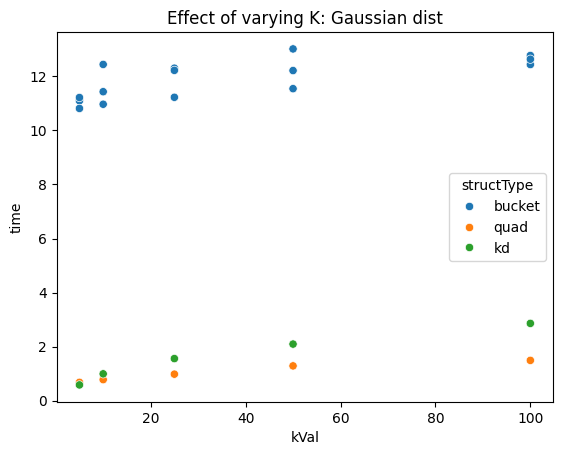

In [63]:
#Graph impact of K on all dataStructures gaussian distribution 
k_variable_gaussian_df = df.loc[(df['testType'] == 'k') & (df['distribution'] == 'G')]

sns.scatterplot(y='time',x='kVal',hue='structType',data=k_variable_gaussian_df).set(title='Effect of varying K: Gaussian dist')



[Text(0.5, 1.0, 'Effect of varying K: Uniform dist')]

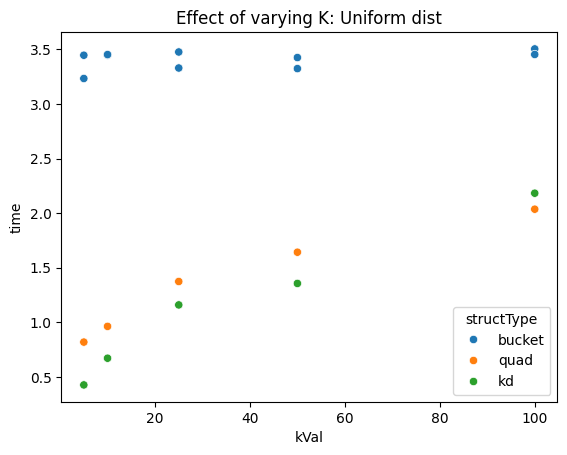

In [64]:
#Graph impact of K on all dataStructures uniform distribution 
k_variable_uniform_df = df.loc[(df['testType'] == 'k') & (df['distribution'] == 'U')]

sns.scatterplot(y='time',x='kVal',hue='structType',data=k_variable_uniform_df).set(title='Effect of varying K: Uniform dist')

In [65]:
import statsmodels.formula.api as sm
#Time vs kVal gaussian Bucket on gaussian distributions:
k_variable_bucket = k_variable_gaussian_df.loc[(k_variable_gaussian_df['structType'] == 'bucket')]

# Fit the OLS model
k_variable_g_b_ols = sm.ols(formula="time ~ kVal", data=k_variable_bucket).fit()

print(k_variable_g_b_ols.summary())


                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     11.95
Date:                Mon, 17 Jun 2024   Prob (F-statistic):            0.00425
Time:                        19:23:19   Log-Likelihood:                -11.134
No. Observations:                  15   AIC:                             26.27
Df Residuals:                      13   BIC:                             27.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.3539      0.209     54.330      0.0

/Users/melanieprettyman/Desktop/MSD/HW4/pythonProject/.venv/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


In [66]:
#Time vs kVal gaussian QuadTree on gaussian distributions:
k_variable_gaussian_quad = k_variable_gaussian_df.loc[ (df['structType'] == 'quad')]

# Fit the OLS model
k_variable_g_q_ols = sm.ols(formula="time ~ kVal", data=k_variable_gaussian_quad).fit()

print(k_variable_g_q_ols.summary())


                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     35.16
Date:                Mon, 17 Jun 2024   Prob (F-statistic):            0.00958
Time:                        19:23:19   Log-Likelihood:                 5.1946
No. Observations:                   5   AIC:                            -6.389
Df Residuals:                       3   BIC:                            -7.170
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7256      0.073      9.902      0.0

/Users/melanieprettyman/Desktop/MSD/HW4/pythonProject/.venv/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [67]:
#Time vs kVal gaussian QuadTree on gaussian distributions:
k_variable_gaussian_kd = k_variable_gaussian_df.loc[(df['structType'] == 'kd')]

# Fit the OLS model
k_variable_g_kd_ols = sm.ols(formula="time ~ kVal", data=k_variable_gaussian_kd).fit()

print(k_variable_g_kd_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     44.21
Date:                Mon, 17 Jun 2024   Prob (F-statistic):            0.00693
Time:                        19:23:19   Log-Likelihood:                0.88684
No. Observations:                   5   AIC:                             2.226
Df Residuals:                       3   BIC:                             1.445
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7690      0.173      4.434      0.0

/Users/melanieprettyman/Desktop/MSD/HW4/pythonProject/.venv/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


[Text(0.5, 1.0, 'Effect of variable N: gaussian dist')]

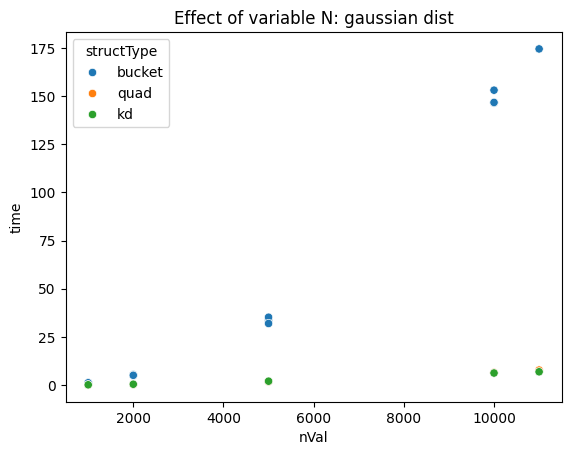

In [68]:
#Graph the impact of n on data structs gaussian distribution 
n_variable_gaussian_df = df.loc[(df['testType'] == 'n') & (df['distribution'] == 'G')]

sns.scatterplot(y='time',x='nVal',hue='structType',data=n_variable_gaussian_df).set(title='Effect of variable N: gaussian dist')

[Text(0.5, 1.0, 'Effect of variable N : uniform dist')]

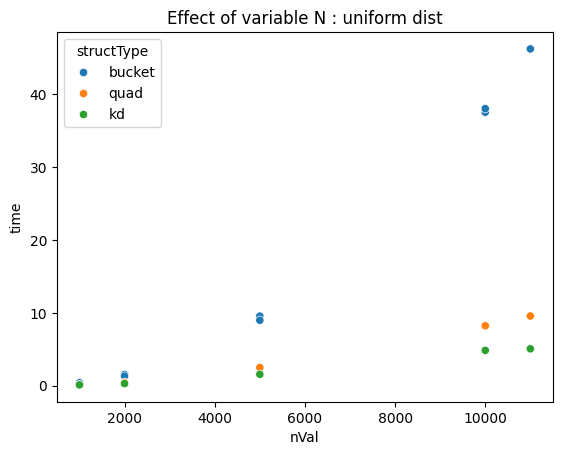

In [69]:
n_variable_uniform_df = df.loc[(df['testType'] == 'n') & (df['distribution'] == 'U')]


sns.scatterplot(y='time',x='nVal',hue='structType',data=n_variable_uniform_df).set(title='Effect of variable N : uniform dist')

In [70]:
#Time vs nVal gaussian Bucket on gaussian distributions:
n_variable_bucket = n_variable_gaussian_df.loc[(n_variable_gaussian_df['structType'] == 'bucket')]

# Fit the OLS model
n_variable_g_b_ols = sm.ols(formula="time ~ kVal", data=n_variable_bucket).fit()

print(n_variable_g_b_ols.summary())

/Users/melanieprettyman/Desktop/MSD/HW4/pythonProject/.venv/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)


                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 17 Jun 2024   Prob (F-statistic):                nan
Time:                        19:23:19   Log-Likelihood:                -73.081
No. Observations:                  13   AIC:                             148.2
Df Residuals:                      12   BIC:                             148.7
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0910      0.031      2.952      0.0

In [71]:
#Time vs nVal gaussian Quad on gaussian distributions:
n_variable_quad = n_variable_gaussian_df.loc[(n_variable_gaussian_df['structType'] == 'quad')]

# Fit the OLS model
n_variable_g_q_ols = sm.ols(formula="time ~ kVal", data=n_variable_quad).fit()

print(n_variable_g_q_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 17 Jun 2024   Prob (F-statistic):                nan
Time:                        19:23:19   Log-Likelihood:                -12.945
No. Observations:                   5   AIC:                             27.89
Df Residuals:                       4   BIC:                             27.50
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0053      0.003      2.060      0.1

/Users/melanieprettyman/Desktop/MSD/HW4/pythonProject/.venv/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [72]:
#Time vs nVal gaussian KD on gaussian distributions:
n_variable_kd = n_variable_gaussian_df.loc[(n_variable_gaussian_df['structType'] == 'kd')]

# Fit the OLS model
n_variable_g_kd_ols = sm.ols(formula="time ~ kVal", data=n_variable_kd).fit()

print(n_variable_g_kd_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 17 Jun 2024   Prob (F-statistic):                nan
Time:                        19:23:19   Log-Likelihood:                -12.366
No. Observations:                   5   AIC:                             26.73
Df Residuals:                       4   BIC:                             26.34
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0051      0.002      2.209      0.0

/Users/melanieprettyman/Desktop/MSD/HW4/pythonProject/.venv/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


[Text(0.5, 1.0, 'Effect of variable D : gaussian dist')]

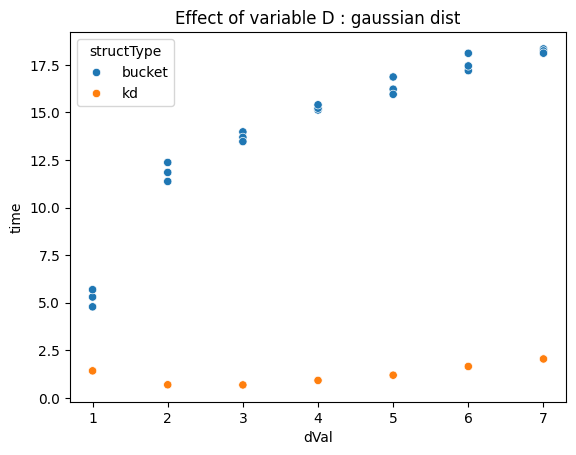

In [73]:
#Graph the impact of n on data structs gaussian distribution 
d_variable_gaussian_df = df.loc[(df['testType'] == 'd') & (df['distribution'] == 'G')]


sns.scatterplot(y='time',x='dVal',hue='structType',data=d_variable_gaussian_df).set(title='Effect of variable D : gaussian dist')

In [74]:
#Time vs dVal gaussian Bucket on gaussian distributions:
d_variable_bucket = d_variable_gaussian_df.loc[(d_variable_gaussian_df['structType'] == 'bucket')]

# Fit the OLS model
d_variable_g_b_ols = sm.ols(formula="time ~ kVal", data=d_variable_bucket).fit()

print(d_variable_g_b_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 17 Jun 2024   Prob (F-statistic):                nan
Time:                        19:23:20   Log-Likelihood:                -59.587
No. Observations:                  21   AIC:                             121.2
Df Residuals:                      20   BIC:                             122.2
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0224      0.001     15.192      0.0

[Text(0.5, 1.0, 'Effect of variable D : uniform dist')]

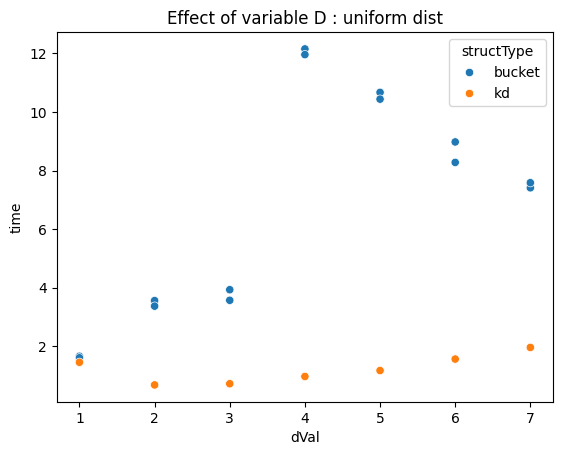

In [75]:
d_variable_uniform_df = df.loc[(df['testType'] == 'd') & (df['distribution'] == 'U')]


sns.scatterplot(y='time',x='dVal',hue='structType',data=d_variable_uniform_df).set(title='Effect of variable D : uniform dist')

[Text(0.5, 1.0, 'Effect of variables K & N : gaussian dist')]

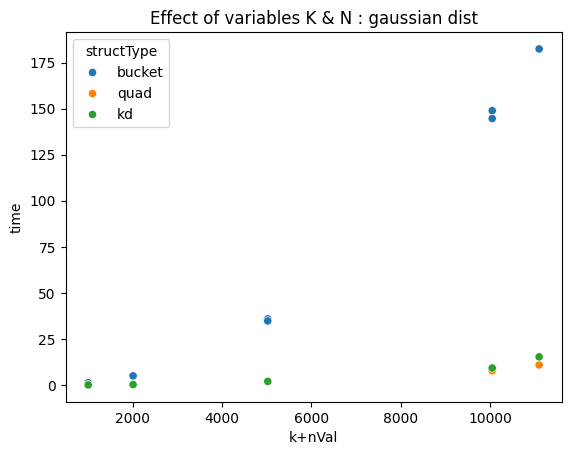

In [76]:
#Time vs varying K and N on gaussian distribution
kn_variable_gaussian_df = df[(df['testType'] == 'kn') & (df['distribution'] == 'G')]
kn_variable_g_df = pd.DataFrame(kn_variable_gaussian_df)
kn_variable_g_df['k+nVal'] = kn_variable_g_df['nVal']+kn_variable_g_df['kVal']
sns.scatterplot(y='time',x='k+nVal',hue='structType',data=kn_variable_g_df).set(title='Effect of variables K & N : gaussian dist')

[Text(0.5, 1.0, 'Effect of variables K & N : uniform dist')]

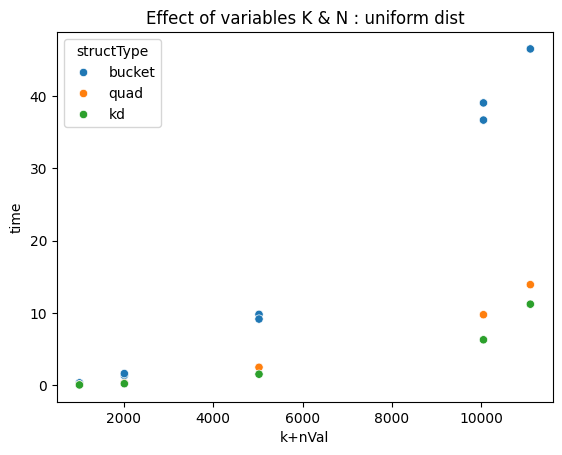

In [77]:
#Time vs varying K and N on uniform distribution
kn_variable_uniform_df = df[(df['testType'] == 'kn') & (df['distribution'] == 'U')]
kn_variable_u_df = pd.DataFrame(kn_variable_uniform_df)
kn_variable_u_df['k+nVal'] = kn_variable_u_df['nVal']+kn_variable_u_df['kVal']
sns.scatterplot(y='time',x='k+nVal',hue='structType',data=kn_variable_u_df).set(title='Effect of variables K & N : uniform dist')

The data structure appears to have a significant correlation with the time taken for computations. Overall, the KDTree demonstrates the highest efficiency, which aligns with expectations. However, its performance slightly declines as both k (number of neighbors) and 
n (number of points) increase in a Gaussian distribution, possibly indicating an inefficiency in the implementation since theoretically, it should still outperform others. Notably, KDTree’s efficiency remains relatively stable as dimensions increase, benefiting from its design which splits data by dimensions at each level. In contrast, bucketing struggles with increasing dimensionality and performs particularly poorly as N or K+N increase. This is logical since bucket-based KNN queries must iterate through all points within a specified bucket regardless of the neighbor count.

For bucketing, the effects of dimensionality in uniform distributions were unexpected; computation time increased from one to four dimensions and then decreased starting at five dimensions. This trend was consistent across multiple tests but was not observed with Gaussian distributions. A possible explanation is that uniform distribution results in more evenly filled buckets, slightly reducing search time. However, the significant impact of dimensionality is still puzzling. The time complexity of bucket sorting, ideally as efficient as O(n log n) with a good sorting algorithm, does not seem to be achieved in our implementation, leading to suboptimal performance.

Interestingly, in one instance, the quad tree outperformed the KD tree when k and n were increased in a Gaussian distribution, which was surprising given that KD trees typically have a search complexity of O(log n), and quad trees have O(log n+k). This could suggest that the difference in performance might stem from how the split points are chosen in both data structures, or it might indicate an underlying inefficiency in my KD tree implementation. Repeated tests yielded consistent results, reinforcing this observation.